# Final Project Proposal: Population & Poverty Trends in the US

### Team Members

- Alexander Schmig
- Jacob Shaw

## Abstract

This project’s goal is to present visualizations to show trends in population growth by age and
sex (hence referred to as population rate) and in poverty by county in the United States, and to
show their relationship and correlation (or lack thereof). Our proposal will cover the datasets we
will be utilizing, the hypotheses we are seeking to answer, and the visualizations we will be
creating to represent the data and to answer those hypotheses.

# Introduction

The reason we want to analyze this data is to show if there are any correlations between
population rates and poverty rates in the last 10 years since the most recent dataset made
available (that being data for the year 2022). The intended purpose of our project is to display
the trends of population rate variations in counties alongside the poverty rate trend variations in
the same counties. With this information, we hope to answer with significant confidence the null
hypothesis that there is no correlation between population rates and poverty rates; or answer
with significant confidence the alternative hypothesis, that there is some significant correlation
between population rates and poverty rates.

The visualizations found while researching this topic were focused more on poverty exclusively
([here[1]](https://ourworldindata.org/poverty) and [here[2]](https://www.visualcapitalist.com/visualizing-poverty-rate-u-s-states/)) or were global-focused where the intent was to focus on country-wide
poverty rates. The United States Census Bureau, where we found our datasets, provides a
source of several visualizations based on these datasets ([here [3]](https://www.census.gov/topics/income-poverty/library/visualizations.html)). The visualizations widely
vary, looking at childhood poverty to women's earnings to measuring the nation's social and
economic well-being. With all of these visualizations not quite covering population and poverty
rates, I find that our visualization will contribute new information to this area of research.

## Questions or Objectives

Our visualizations will be both geographic and tabular. There will be two geographic maps, one
to show the median poverty rate differences from 2012-2022 and the other to show median
population rate differences from 2012-2022. Accompanying these maps will be tabular graphs
(or possibly bar graphs if deemed more visually effective) which show the top counties that have
either:

### Objectives 1

1. High poverty and high population rates

2. High poverty and low population rates

3. Low poverty and high population rates

4. Low poverty and low population rates

We define “high” rates as a positive value, and “low” rates as either 0% change or negative
values. Population rates are generally preferred to be positive as that means there will be more
children born and people who have moved into the area than people who have died and those
who no longer live in the area. Similarly for poverty, we define a “high” rate as an increase of
individuals who fall below the poverty line as defined by the federal government in that area
over time and “low” rates as a decrease in individuals within the area who fall below the poverty
line.

Another objective is to view the correlation between the rate of poverty and rate of population.
Does there appear to be strong correlation (positive or negative) or is there a lack of relationship
(zero correlation). More specifically,

### Objectives 2

1. What happens to poverty rates in low population counties as population increases?

2. What happens to poverty rates in high population counties as population decreases?

3. What happens to population rates in low poverty counties as poverty increases?

4. What happens to population rates in high poverty counties as poverty decreases?


# Process

## Data Processing

In [6]:
import pandas as pd

path = "2010_2022_pov_data.csv"
df = pd.read_csv(path, low_memory=False)
df.head()

GEO_ID                     NAME  S1701_C01_001E  S1701_C01_001M  \
0  0500000US01003  Baldwin County, Alabama          180686             985   
1  0500000US01015  Calhoun County, Alabama          116553            1987   
2  0500000US01043  Cullman County, Alabama           79692             834   
3  0500000US01049   DeKalb County, Alabama           70453             682   
4  0500000US01051   Elmore County, Alabama           72069            3261   

   S1701_C02_001E  S1701_C02_001M  S1701_C03_001E  S1701_C03_001M  \
0           23610            4573            13.1             2.5   
1           29082            4105            25.0             3.4   
2           16848            3811            21.1             4.8   
3           13788            4362            19.6             6.2   
4            7923            2292            11.0             3.1   

   S1701_C01_002E  S1701_C01_002M  ...  S1701_C03_061E  S1701_C03_061M  \
0           41865             592  ...             NaN             NaN   
1           26847             296  ...             NaN             NaN   
2           18892             588  ...             NaN             NaN   
3           18233             460  ...             NaN             NaN   
4           18189             306  ...             NaN             NaN   

   Unnamed: 368  S1701_C01_062E  S1701_C01_062M  S1701_C02_062E  \
0           NaN             NaN             NaN             NaN   
1           NaN             NaN             NaN             NaN   
2           NaN             NaN             NaN             NaN   
3           NaN             NaN             NaN             NaN   
4           NaN             NaN             NaN             NaN   

   S1701_C02_062M  S1701_C03_062E  S1701_C03_062M  Unnamed: 374  
0             NaN             NaN             NaN           NaN  
1             NaN             NaN             NaN           NaN  
2             NaN             NaN             NaN           NaN  
3             NaN             NaN             NaN           NaN  
4             NaN             NaN             NaN           NaN  

[5 rows x 378 columns]

In [7]:
# selecting and renaming columns of interest
columns_renamed = {
                    'NAME': 'NAME',
                    'S1701_C01_001E': 'total_pop',
                    'S1701_C02_001E': 'below_pov',
                    'S1701_C01_002E': 'total_under_18',
                    'S1701_C02_002E': 'below_pov_under_18',
                    'S1701_C01_004E': 'total_18_to_64',
                    'S1701_C02_004E': 'below_pov_18_to_64',
                    'S1701_C01_005E': 'total_over_64',
                    'S1701_C02_005E': 'below_pov_over_64',
                    'S1701_C01_006E': 'total_male',
                    'S1701_C02_006E': 'below_pov_male',
                    'S1701_C01_007E': 'total_female',
                    'S1701_C02_007E': 'below_pov_female',
                    'YEAR': 'YEAR'}
df = df.rename(columns=columns_renamed)[columns_renamed.values()]
df.head()

NAME  total_pop  below_pov  total_under_18  \
0  Baldwin County, Alabama     180686      23610           41865   
1  Calhoun County, Alabama     116553      29082           26847   
2  Cullman County, Alabama      79692      16848           18892   
3   DeKalb County, Alabama      70453      13788           18233   
4   Elmore County, Alabama      72069       7923           18189   

   below_pov_under_18  total_18_to_64  below_pov_18_to_64 total_over_64  \
0                8091          109204               13958         29617   
1                9137           73074               18319         16632   
2                5543           48175               10051         12625   
3                5609           42707                7109          9513   
4                2707           45045                4698          8835   

  below_pov_over_64  total_male  below_pov_male  total_female  \
0              1561       88311            8822         92375   
1              1626       55830           11527         60723   
2              1254       39438            7604         40254   
3              1070       35219            6769         35234   
4               518       34368            4073         37701   

   below_pov_female  YEAR  
0             14788  2010  
1             17555  2010  
2              9244  2010  
3              7019  2010  
4              3850  2010

In [8]:
df["total_pov_ratio"] = df["below_pov"] / df["total_pop"]
df["under_18_pov_ratio"] = df["below_pov_under_18"] / df["total_under_18"]
df["18_to_64_pov_ratio"] = df["below_pov_18_to_64"] / df["total_18_to_64"]
df["male_pov_ratio"] = df["below_pov_male"] / df["total_male"]
df["female_pov_ratio"] = df["below_pov_female"] / df["total_female"]
df.head()

NAME  total_pop  below_pov  total_under_18  \
0  Baldwin County, Alabama     180686      23610           41865   
1  Calhoun County, Alabama     116553      29082           26847   
2  Cullman County, Alabama      79692      16848           18892   
3   DeKalb County, Alabama      70453      13788           18233   
4   Elmore County, Alabama      72069       7923           18189   

   below_pov_under_18  total_18_to_64  below_pov_18_to_64 total_over_64  \
0                8091          109204               13958         29617   
1                9137           73074               18319         16632   
2                5543           48175               10051         12625   
3                5609           42707                7109          9513   
4                2707           45045                4698          8835   

  below_pov_over_64  total_male  below_pov_male  total_female  \
0              1561       88311            8822         92375   
1              1626       55830           11527         60723   
2              1254       39438            7604         40254   
3              1070       35219            6769         35234   
4               518       34368            4073         37701   

   below_pov_female  YEAR  total_pov_ratio  under_18_pov_ratio  \
0             14788  2010         0.130669            0.193264   
1             17555  2010         0.249517            0.340336   
2              9244  2010         0.211414            0.293405   
3              7019  2010         0.195705            0.307629   
4              3850  2010         0.109936            0.148826   

   18_to_64_pov_ratio  male_pov_ratio  female_pov_ratio  
0            0.127816        0.099897          0.160087  
1            0.250691        0.206466          0.289100  
2            0.208635        0.192809          0.229642  
3            0.166460        0.192197          0.199211  
4            0.104296        0.118511          0.102119

## Dataset

We have now refined our dataset and are ready to create visualizations.

This datset is tidy. 

1. Each variable forms a column: Our main variables are the County, Year, and the count of people (total population or count in poverty). Also, the computed columns for population growth and poverty rate growth.

2. Each Observation forms a row: Our observations are a county for a given year, this is satisfied.

3. Each type of observational unit forms a table: Our dataset fundamentally satisfies this requirement

## Distribution

In [11]:
df_yoy = pd.DataFrame()

for name in set(df["NAME"].to_list()):
    # creating copy to fully separate dataframes
    dt = df[df["NAME"] == name].copy()
    # this works because we loaded and added data to the dataset 
    # in order of oldest to newest
    dt["total_pop_yoy"] = dt["total_pop"].pct_change(periods=1)
    dt["total_pov_ratio_yoy"] = dt["total_pov_ratio"].pct_change(periods=1)
    df_yoy = pd.concat([df_yoy, dt])
df_yoy.head()

NAME  total_pop  below_pov  total_under_18  \
50    Humboldt County, California     131312      23237           25953   
868   Humboldt County, California     130855      28345           25338   
1690  Humboldt County, California     131708      29814           26203   
2515  Humboldt County, California     131135      28624           25183   
3343  Humboldt County, California     131867      27977           25770   

      below_pov_under_18  total_18_to_64  below_pov_18_to_64 total_over_64  \
50                  4657           88165               17000         17194   
868                 6816           87757               20562         17760   
1690                7340           86419               20806         19086   
2515                6310           86340               20849         19612   
3343                5753           85970               20867         20127   

     below_pov_over_64  total_male  ...  total_female  below_pov_female  YEAR  \
50                1580       65608  ...         65704             12577  2010   
868                967       65817  ...         65038             15511  2011   
1690              1668       66051  ...         65657             16671  2012   
2515              1465       65308  ...         65827             14565  2013   
3343              1357       65650  ...         66217             14593  2014   

      total_pov_ratio  under_18_pov_ratio  18_to_64_pov_ratio  male_pov_ratio  \
50           0.176960            0.179440            0.192820        0.162480   
868          0.216614            0.269003            0.234306        0.194995   
1690         0.226364            0.280121            0.240757        0.198983   
2515         0.218279            0.250566            0.241476        0.215272   
3343         0.212161            0.223244            0.242724        0.203869   

      female_pov_ratio  total_pop_yoy  total_pov_ratio_yoy  
50            0.191419            NaN                  NaN  
868           0.238491      -0.003480             0.224082  
1690          0.253910       0.006519             0.045014  
2515          0.221262      -0.004351            -0.035719  
3343          0.220381       0.005582            -0.028029  

[5 rows x 21 columns]

### Poverty Ratio

One of the most interesting columns we have to look at is the poverty rate. We used the Freedman-Diaconis rule, as the dataset is large enough for this to be reasonable, but it also more flexible with deviations from the normal distributions. 

Here, we see the distribution to be slightly right skewed, but somewhat normal overall. This somewhat makes sense, as we know that income is right skewed, which seems reasonable for poverty to also be right skewed, since poverty and income are obviously related. 

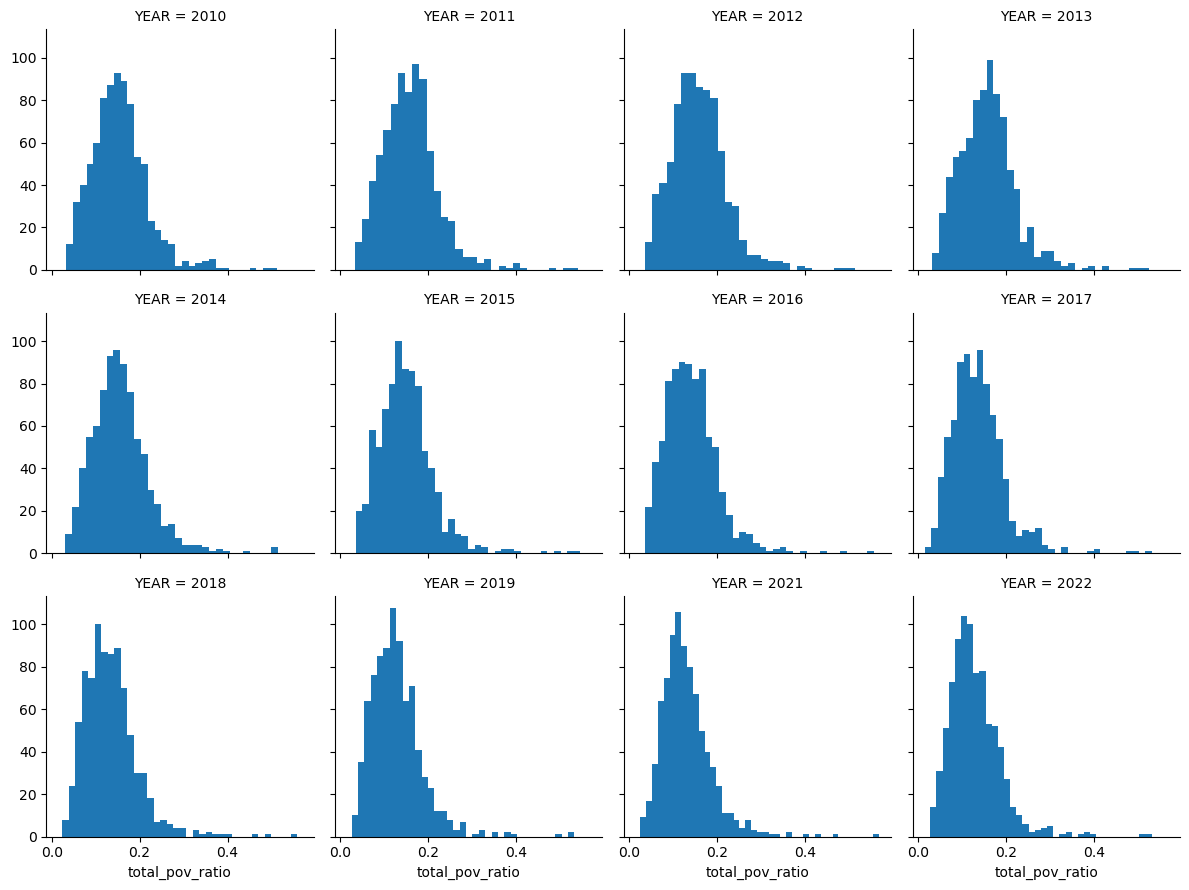

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def hist(x, **kwargs):
    plt.hist(x, **kwargs)
    plt.xticks()
h = sns.FacetGrid(df_yoy, col="YEAR", col_wrap=4)
h.map(hist, "total_pov_ratio", bins="fd")

# Visualizations

Text(0.5, 1.0, 'Population Growth VS Poverty Rate Year over Year')

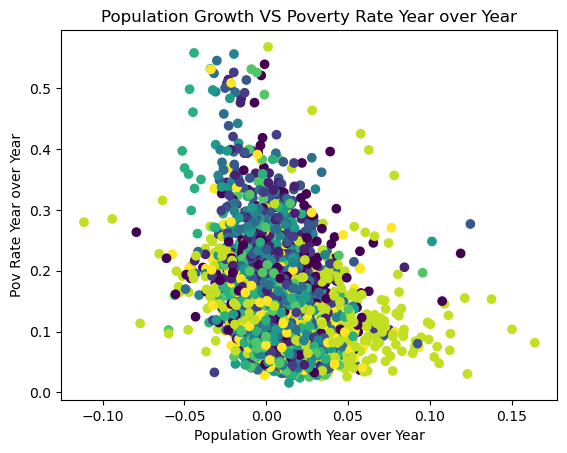

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(
    x=(df_yoy["total_pop_yoy"]), 
    y=(df_yoy["total_pov_ratio"]),
    c=(df_yoy["YEAR"])
)
plt.xlabel("Population Growth Year over Year")
plt.ylabel("Pov Rate Year over Year")
plt.title("Population Growth VS Poverty Rate Year over Year")

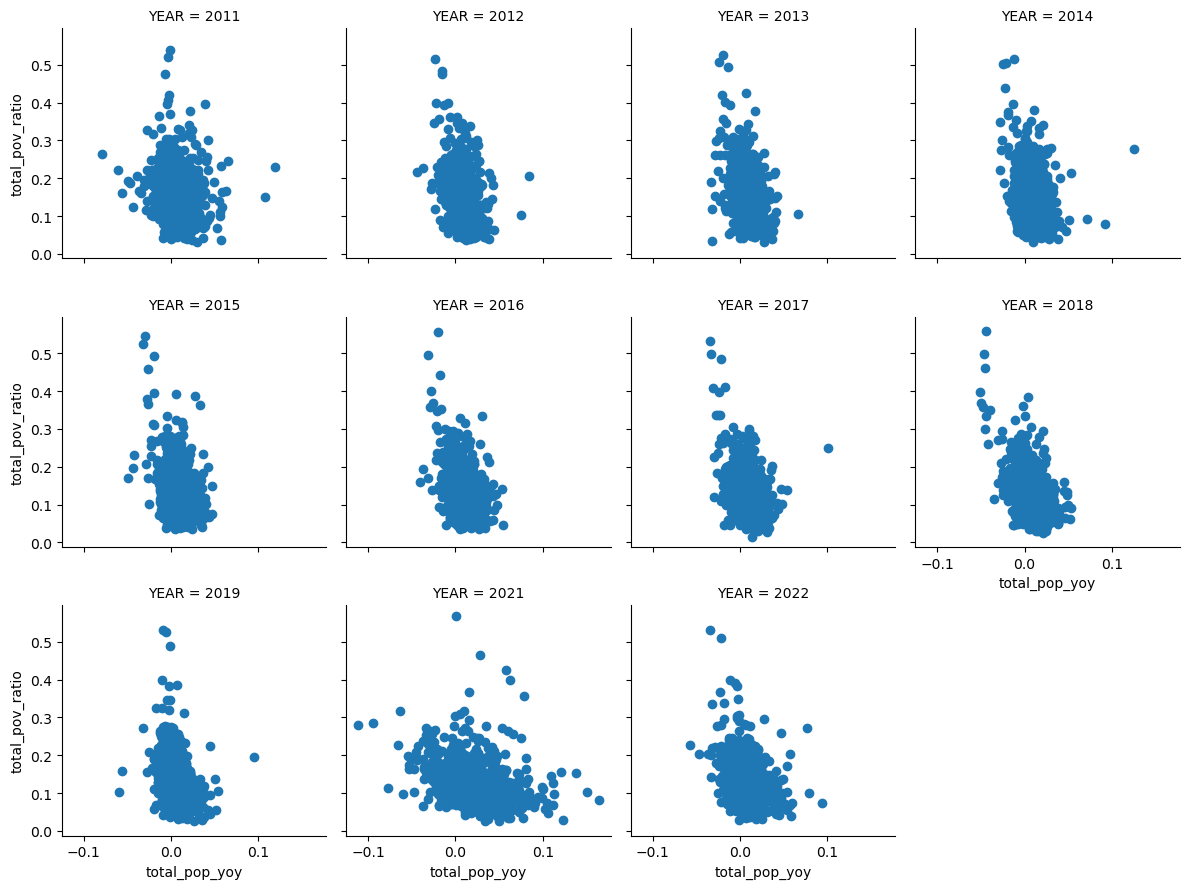

In [16]:
import seaborn as sns
df_yoy_t = df_yoy[df_yoy["YEAR"] != 2010]
g = sns.FacetGrid(df_yoy_t, col="YEAR", col_wrap=4)
g = g.map(plt.scatter, "total_pop_yoy", "total_pov_ratio")

These visualization appears to show no clear relationship between the population growth vs poverty growt, as the plot appears as a blob. 

When looking at each year individually, we still end up with no clear relationship coming through. 

Based on both of these plots, I think we can call this a failed Experiment.

# Results

## Objectives 1


## Objectives 2

Since we have no clear relationship what-so-ever, it is pointless to examine those 4 thoughts, as the aggregates would not have much meaning. This is possibly because we are looking at the population for which poverty can be determined, and that did not necessarily move in the same way the population growth moved. We likely would have had better information if we had used the true population and compared that to the poverty growth. 

In [19]:
df_yoy

NAME  total_pop  below_pov  total_under_18  \
50    Humboldt County, California     131312      23237           25953   
868   Humboldt County, California     130855      28345           25338   
1690  Humboldt County, California     131708      29814           26203   
2515  Humboldt County, California     131135      28624           25183   
3343  Humboldt County, California     131867      27977           25770   
...                           ...        ...        ...             ...   
6324        Franklin County, Ohio    1261641     201099          297891   
7161        Franklin County, Ohio    1281150     198457          301209   
8001        Franklin County, Ohio    1286381     172331          300484   
8842        Franklin County, Ohio    1292793     183647          302743   
9687        Franklin County, Ohio    1293222     194696          299099   

      below_pov_under_18  total_18_to_64  below_pov_18_to_64 total_over_64  \
50                  4657           88165               17000         17194   
868                 6816           87757               20562         17760   
1690                7340           86419               20806         19086   
2515                6310           86340               20849         19612   
3343                5753           85970               20867         20127   
...                  ...             ...                 ...           ...   
6324               66891          206885               45465        296866   
7161               67059          209948               47382        300688   
8001               55303          209592               37295        299258   
8842               61046          216392               41563        301678   
9687               63690          214887               48465        297225   

     below_pov_over_64  total_male  ...  total_female  below_pov_female  YEAR  \
50                1580       65608  ...         65704             12577  2010   
868                967       65817  ...         65038             15511  2011   
1690              1668       66051  ...         65657             16671  2012   
2515              1465       65308  ...         65827             14565  2013   
3343              1357       65650  ...         66217             14593  2014   
...                ...         ...  ...           ...               ...   ...   
6324             65866      817119  ...        342676             62581  2017   
7161             66645      825515  ...        348569             62531  2018   
8001             54453      827117  ...        347362             55702  2019   
8842             59981      825606  ...        340565             57808  2021   
9687             61851      824319  ...        341822             60765  2022   

      total_pov_ratio  under_18_pov_ratio  18_to_64_pov_ratio  male_pov_ratio  \
50           0.176960            0.179440            0.192820        0.162480   
868          0.216614            0.269003            0.234306        0.194995   
1690         0.226364            0.280121            0.240757        0.198983   
2515         0.218279            0.250566            0.241476        0.215272   
3343         0.212161            0.223244            0.242724        0.203869   
...               ...                 ...                 ...             ...   
6324         0.159395            0.224549            0.219760        0.146204   
7161         0.154905            0.222633            0.225684        0.142146   
8001         0.133966            0.184046            0.177941        0.123814   
8842         0.142054            0.201643            0.192073        0.131736   
9687         0.150551            0.212940            0.225537        0.139797   

      female_pov_ratio  total_pop_yoy  total_pov_ratio_yoy  
50            0.191419            NaN                  NaN  
868           0.238491      -0.003480             0.224082  
1690          0.253910       0.006519             0.045014  
2

In [20]:
df_yoy[['County', 'State']] = df_yoy['NAME'].str.split(', ',expand=True)

In [21]:
# Code found here:
# https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
#abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [22]:
df_yoy['State Abrv'] = df_yoy['State'].apply(lambda x: us_state_to_abbrev[x])

In [23]:
df_yoy.columns

Index(['NAME', 'total_pop', 'below_pov', 'total_under_18',
       'below_pov_under_18', 'total_18_to_64', 'below_pov_18_to_64',
       'total_over_64', 'below_pov_over_64', 'total_male', 'below_pov_male',
       'total_female', 'below_pov_female', 'YEAR', 'total_pov_ratio',
       'under_18_pov_ratio', '18_to_64_pov_ratio', 'male_pov_ratio',
       'female_pov_ratio', 'total_pop_yoy', 'total_pov_ratio_yoy', 'County',
       'State', 'State Abrv'],
      dtype='object')

# Fixing the "Over 64 Age Range" Columns
In these two columns, there exists a letter "N", which is used by the USCB to denote that a sample size was too small to estimate with any amount of measureable accuracy.  As such, I will be replacing these values with 0.

We can see that these two columns are the only two that we would expect to be numeric, yet they are still object types.

In [25]:
df_yoy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 50 to 9687
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NAME                 9986 non-null   object 
 1   total_pop            9986 non-null   int64  
 2   below_pov            9986 non-null   int64  
 3   total_under_18       9986 non-null   int64  
 4   below_pov_under_18   9986 non-null   int64  
 5   total_18_to_64       9986 non-null   int64  
 6   below_pov_18_to_64   9986 non-null   int64  
 7   total_over_64        9986 non-null   object 
 8   below_pov_over_64    9986 non-null   object 
 9   total_male           9986 non-null   int64  
 10  below_pov_male       9986 non-null   int64  
 11  total_female         9986 non-null   int64  
 12  below_pov_female     9986 non-null   int64  
 13  YEAR                 9986 non-null   int64  
 14  total_pov_ratio      9986 non-null   float64
 15  under_18_pov_ratio   9986 non-null   float

In [26]:
df_yoy['total_over_64'] = df_yoy['total_over_64'].replace("N", 0).astype(int)

In [27]:
df_yoy['below_pov_over_64'] = df_yoy['below_pov_over_64'].replace("N", 0).astype(int)

### Establish a Map Making Function
Below, we created a function for generating a state-based cloropleth map to reduce the code clutter in our script and make it more legible.

In [29]:
import plotly.graph_objects as go

In [30]:
def country_graph_single_year(dataframe, x_variable, Title):
    year = dataframe['YEAR'].unique()[0]
    
    fig = go.Figure(data = go.Choropleth(
        locations = dataframe['State Abrv'],
        z = x_variable, 
        #z = df_yoy_2022['total_pov_ratio'], # replace with X variable
        locationmode = 'USA-states', 
        colorscale = 'Reds',
        colorbar_title = "Percent",
    ))
    
    fig.update_layout(
        title_text = f'{Title} in {year}',
        geo_scope='usa', 
        width=1100,
        height=800
    )
    
    fig.show()

### State-and-Year-based Grouping
In order to proceed to visualizations, the last step is to group our numeric data by both State Abbreviation and Year using the aggregate of sum.

We also must remove the "ratio" columns since they were calculated on the larger-scale County-level data.  Once they are remover, we will remake them for State-level data.

Additionally, we also remove Puerto Rico from our rows since we are only focused on states and Washington, D.C. for this project.

In [32]:
ratio_list = [x for x in df_yoy.columns.to_list() if 'ratio' in x]
ratio_list

['total_pov_ratio',
 'under_18_pov_ratio',
 '18_to_64_pov_ratio',
 'male_pov_ratio',
 'female_pov_ratio',
 'total_pov_ratio_yoy']

In [33]:
df_states = df_yoy.drop(columns = ['NAME','County','State']+ratio_list)
df_states = df_states.groupby(by = ['State Abrv', 'YEAR'], as_index = False).sum()

In [34]:
df_states["total_pov_ratio"] = df_states["below_pov"] / df_states["total_pop"]
df_states["under_18_pov_ratio"] = df_states["below_pov_under_18"] / df_states["total_under_18"]
df_states["18_to_64_pov_ratio"] = df_states["below_pov_18_to_64"] / df_states["total_18_to_64"]
df_states["male_pov_ratio"] = df_states["below_pov_male"] / df_states["total_male"]
df_states["female_pov_ratio"] = df_states["below_pov_female"] / df_states["total_female"]

In [35]:
df_states

State Abrv  YEAR  total_pop  below_pov  total_under_18  \
0           AK  2010     467845      41812          124630   
1           AK  2011     474913      42967          124699   
2           AK  2012     481278      39999          124414   
3           AK  2013     483411      35038          124112   
4           AK  2014     484272      48015          123311   
..         ...   ...        ...        ...             ...   
619         WY  2017     173649      17981           41961   
620         WY  2018     173940      14224           40945   
621         WY  2019     174767      16154           40935   
622         WY  2021     177555      18102           41532   
623         WY  2022     177812      17652           40229   

     below_pov_under_18  total_18_to_64  below_pov_18_to_64  total_over_64  \
0                 14286          310592               25542          32623   
1                 16270          313564               24791          36650   
2                 13797          318459               24646          38405   
3                  9857          318444               23319          40855   
4                 17622          317292               28508          43669   
..                  ...             ...                 ...            ...   
619                4208           29961                2726          41740   
620                4581           29790                3113          40905   
621                4995           31340                3919          40477   
622                5765           31183                3756          41335   
623                4961           30970                3530          40016   

     below_pov_over_64  total_male  below_pov_male  total_female  \
0                 1984      237944           19077        229901   
1                 1906      239115           18678        235798   
2                 1556      244959           18852        236319   
3                 1862      248254           15837        235157   
4                 1885      248873           20795        235399   
..                 ...         ...             ...           ...   
619               3987      106059           11345         38741   
620               4581      105630            7937         38685   
621               4537      105230            9727         38346   
622               5568      106011           11309         38166   
623               4748      106870           10058         38926   

     below_pov_female  total_pop_yoy  total_pov_ratio  under_18_pov_ratio  \
0               22735       0.000000         0.089371            0.114627   
1               24289       0.055152         0.090473            0.130474   
2               21147       0.039689         0.083110            0.110896   
3               19201       0.016460         0.072481            0.079420   
4               27220       0.010659         0.099149            0.142907   
..                ...            ...              ...                 ...   
619              5223      -0.014330         0.103548            0.100284   
620              4297       0.002330         0.081775            0.111882   
621              6079       0.011119         0.092432            0.122023   
622              4997       0.029956         0.101952            0.138809   
623              4023       0.003236         0.099273            0.123319   

     18_to_64_pov_ratio  male_pov_ratio  female_pov_ratio  
0              0.082237        0.080174          0.098890  
1              0.079062        0.078113          0.103008  
2              0.077391        0.076960          0.089485  
3              0.073228        0.063794          0.081652  
4              0.089848        0.083557          0.115633  
..                  ...             ...               ...  
619            0.090985        0.106969          0.134818  
620            0.104498        0.075140          0.111077  
621            0.125048        0.092436 

In [36]:
df_states = df_states[df_states['State Abrv'] != 'PR']

In [37]:
df_states.shape

(612, 20)

In [38]:
(237944 + 229901)/467845

1.0

In [39]:
(239115 + 235798)/474913

1.0

In [40]:
df_states.shape

(612, 20)

In [41]:
df_states['total_genders'] = df_states['total_male'] + df_states['total_female']
df_states['total_gender_div_total_pop'] = df_states['total_genders'] / df_states['total_pop']
#df_states['total_gender_div_total_pop'][df_states['total_gender_div_total_pop'] != 1]
df_states['total_gender_div_total_pop'].min()

/var/folders/z1/ly8kccd50r56yj1_qq1np6q80000gp/T/ipykernel_37291/3089089488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states['total_genders'] = df_states['total_male'] + df_states['total_female']
/var/folders/z1/ly8kccd50r56yj1_qq1np6q80000gp/T/ipykernel_37291/3089089488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states['total_gender_div_total_pop'] = df_states['total_genders'] / df_states['total_pop']


0.7887865325035398

In [42]:
df_yoy['total_genders'] = df_yoy['total_male'] + df_yoy['total_female']
df_yoy['total_gender_div_total_pop'] = df_yoy['total_genders'] / df_yoy['total_pop']
df_yoy['total_gender_div_total_pop'][df_yoy['total_gender_div_total_pop'] != 1]

4171    0.896952
5001    0.884654
5832    0.886625
6669    0.877475
7507    0.874026
          ...   
6324    0.919275
7161    0.916430
8001    0.913010
8842    0.902055
9687    0.901733
Name: total_gender_div_total_pop, Length: 5865, dtype: float64

In [43]:
df_yoy.shape

(9986, 26)

From the above analyses, we can see that the male and female total populations are, in fact, estimations that do not always sum up to the state's total population.  The lowest representaiton when male and female populations are combined is 78.8% of the state's total population for that year.  The USCB created these features as estimations using statitstical measurements.  As such, we will proceed using a degree of caution and understanding that these values are estimates only.

# Map Visualizations of our Data

In [46]:
df_states_2022 = df_states[df_states['YEAR'] == 2022]

In [47]:
print(f'Estimate of the Total Population of the United States in 2022:\n\n{df_states_2022.total_pop.sum()}\n')

Estimate of the Total Population of the United States in 2022:

278854095



This shows our baseline Total Population estimation is 280,212,845 in the US for 2022.  Compare this with the USCB's official press release estimate of 333,287,557 US residents (reference: https://www.census.gov/newsroom/press-releases/2022/2022-population-estimates.html), and we are not accounting for roughly 50 million persons in our data.  This is because, as written here, the USCB does not account for the following 4 groups:
- Institutional group quarters (such as prisons or nursing homes)
- College dormitories
- Military barracks
- Living situations without conventional housing (and who are not in shelters)

reference: https://www.census.gov/topics/income-poverty/poverty/guidance/poverty-measures.html

In [49]:
country_graph_single_year(df_states_2022, 
                          df_states_2022['total_pop'].apply(lambda x: np.round(x/1000000, 2)), 
                          'Total Populations by State (in Millions)')

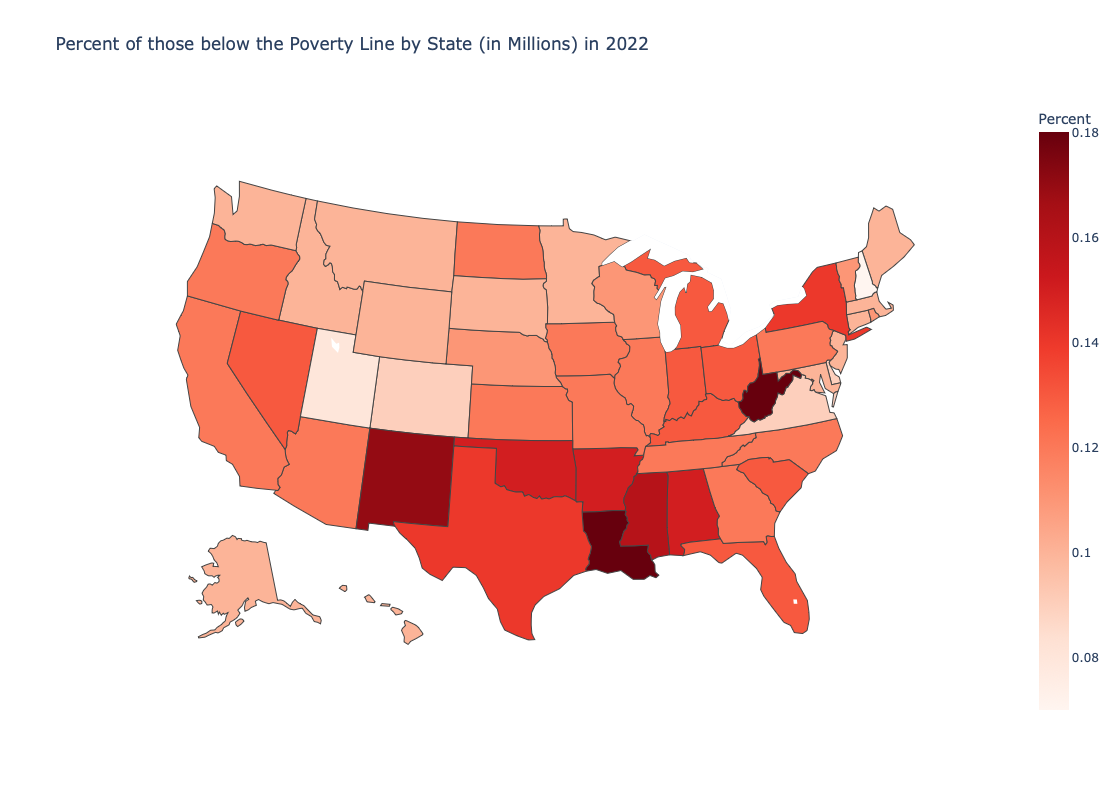

In [55]:
country_graph_single_year(df_states_2022, 
                          df_states_2022['total_pov_ratio'].apply(lambda x: np.round(x, 2)), 
                          'Percent of those below the Poverty Line by State (in Millions)')

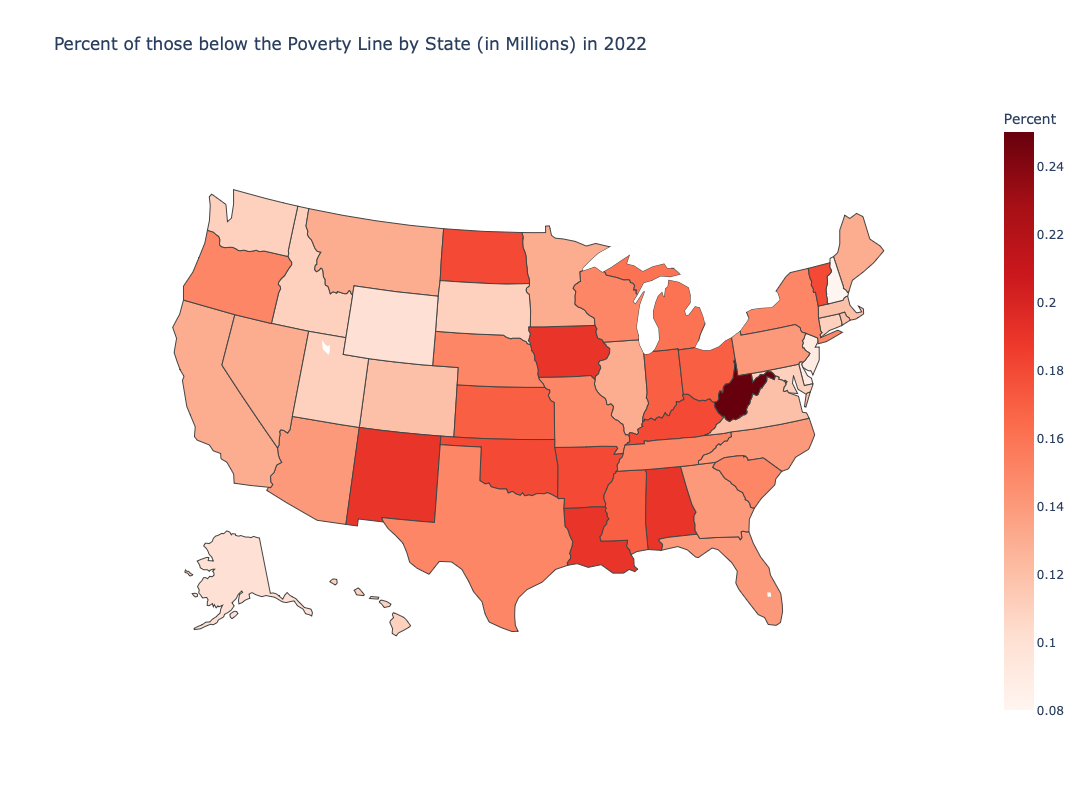

In [57]:
country_graph_single_year(df_states_2022, 
                          df_states_2022['female_pov_ratio'].apply(lambda x: np.round(x, 2)), 
                          'Percent of those below the Poverty Line by State (in Millions)')

In [93]:
def usmap_facets_graph(x_variable, y_variable, **kwargs):    
    fig = go.p(data = go.Choropleth(
        locations = y_variable,
        z = x_variable, 
        #z = df_yoy_2022['total_pov_ratio'], # replace with X variable
        locationmode = 'USA-states', 
        colorscale = 'Reds',
        colorbar_title = "Percent",
    ))
    
    fig.update_layout(
        title_text = "TEST",
        geo_scope='usa', 
        #width=1200,
        #height=800
    )
    
    #fig.show()

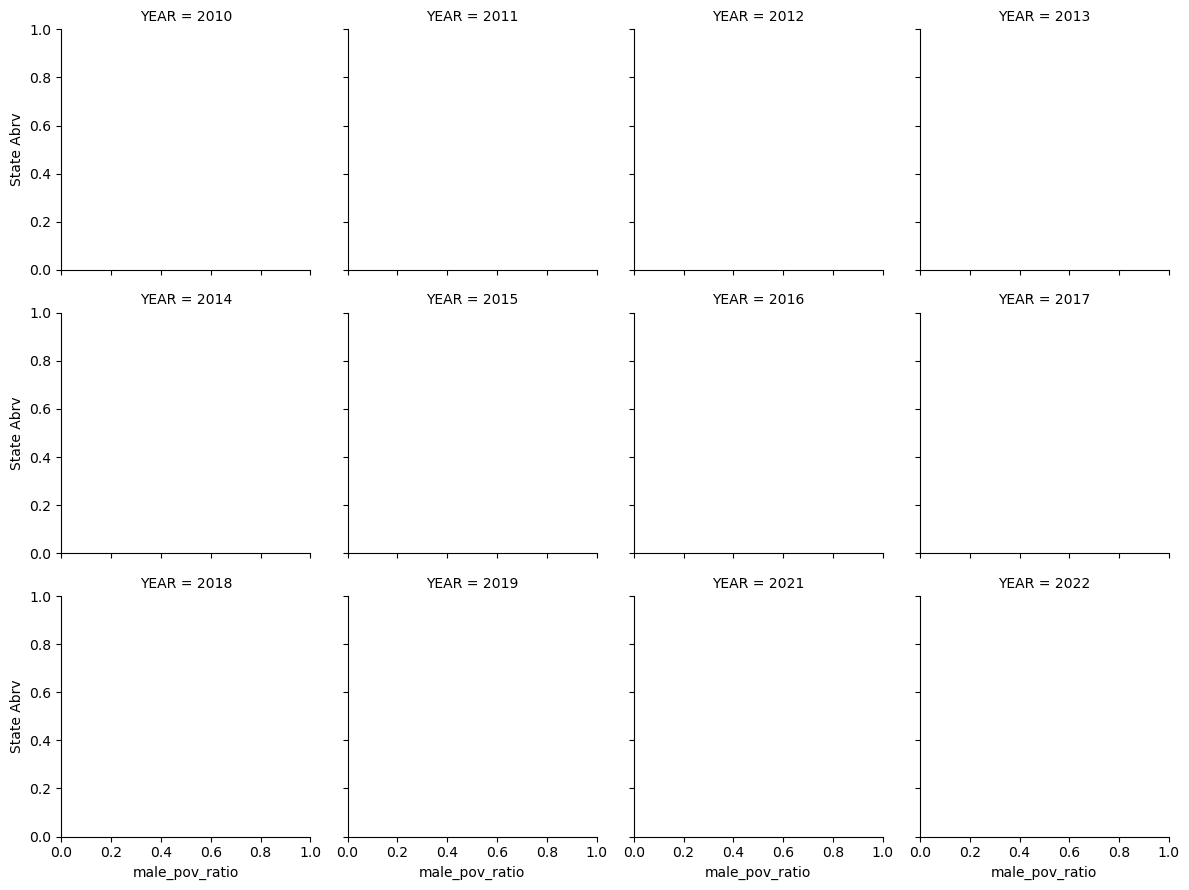

In [95]:

g = sns.FacetGrid(df_states, col="YEAR", col_wrap=4)
g = g.map(usmap_facets_graph, "male_pov_ratio", 'State Abrv')
#plt.show()

In [51]:
country_graph_single_year(df_states_2022, 
                          df_states_2022['male_pov_ratio'].apply(lambda x: np.round(x*100, 2)), 
                          'Male Populations')

In [52]:
df_states

State Abrv  YEAR  total_pop  below_pov  total_under_18  \
0           AK  2010     467845      41812          124630   
1           AK  2011     474913      42967          124699   
2           AK  2012     481278      39999          124414   
3           AK  2013     483411      35038          124112   
4           AK  2014     484272      48015          123311   
..         ...   ...        ...        ...             ...   
619         WY  2017     173649      17981           41961   
620         WY  2018     173940      14224           40945   
621         WY  2019     174767      16154           40935   
622         WY  2021     177555      18102           41532   
623         WY  2022     177812      17652           40229   

     below_pov_under_18  total_18_to_64  below_pov_18_to_64  total_over_64  \
0                 14286          310592               25542          32623   
1                 16270          313564               24791          36650   
2                 13797          318459               24646          38405   
3                  9857          318444               23319          40855   
4                 17622          317292               28508          43669   
..                  ...             ...                 ...            ...   
619                4208           29961                2726          41740   
620                4581           29790                3113          40905   
621                4995           31340                3919          40477   
622                5765           31183                3756          41335   
623                4961           30970                3530          40016   

     below_pov_over_64  ...  total_female  below_pov_female  total_pop_yoy  \
0                 1984  ...        229901             22735       0.000000   
1                 1906  ...        235798             24289       0.055152   
2                 1556  ...        236319             21147       0.039689   
3                 1862  ...        235157             19201       0.016460   
4                 1885  ...        235399             27220       0.010659   
..                 ...  ...           ...               ...            ...   
619               3987  ...         38741              5223      -0.014330   
620               4581  ...         38685              4297       0.002330   
621               4537  ...         38346              6079       0.011119   
622               5568  ...         38166              4997       0.029956   
623               4748  ...         38926              4023       0.003236   

     total_pov_ratio  under_18_pov_ratio  18_to_64_pov_ratio  male_pov_ratio  \
0           0.089371            0.114627            0.082237        0.080174   
1           0.090473            0.130474            0.079062        0.078113   
2           0.083110            0.110896            0.077391        0.076960   
3           0.072481            0.079420            0.073228        0.063794   
4           0.099149            0.142907            0.089848        0.083557   
..               ...                 ...                 ...             ...   
619         0.103548            0.100284            0.090985        0.106969   
620         0.081775            0.111882            0.104498        0.075140   
621         0.092432            0.122023            0.125048        0.092436   
622         0.101952            0.138809            0.120450        0.106678   
623         0.099273            0.123319            0.113981        0.094114   

     female_pov_ratio  total_genders  total_gender_div_total_pop  
0            0.098890         467845                    1.000000  
1            0.103008         474913                    1.000000  
2            0.089485         481278                    1.000000  
3            0.081652         483411                    1.000000  
4            0.115633         484272                    1.000000  
..                ... 

In [53]:
df_states_2022.sort_values(by = 'male_pov_ratio', ascending = False)

State Abrv  YEAR  total_pop  below_pov  total_under_18  \
611         WV  2022     704945     124663          142875   
395         NM  2022    1586427     276297          342365   
227         LA  2022    3312481     580827          771225   
311         MS  2022    1364542     217653          323647   
443         OK  2022    2478618     370863          596958   
23          AL  2022    3675951     549876          818117   
35          AR  2022    1725701     253104          403868   
215         KY  2022    2246573     301066          506516   
419         NY  2022   18190103    2611406         3717311   
431         OH  2022    9609606    1287430         2106999   
275         MI  2022    8459362    1125239         1814456   
155         IA  2022    1642252     190784          376713   
347         ND  2022     416170      50138           95454   
191         IN  2022    4935229     632258         1153367   
503         SC  2022    4435020     572597          952651   
455         OR  2022    3686098     437204          726996   
539         TX  2022   26128646    3594348         6582020   
95          DC  2022     642853      85676          123271   
203         KS  2022    1784385     208168          421322   
47          AZ  2022    7047355     871096         1526307   
575         VT  2022     158877      17978           28550   
407         NV  2022    2792587     350967          609057   
299         MO  2022    4138570     504918          910096   
527         TN  2022    4839753     596238         1082877   
119         FL  2022   21175514    2650848         4087529   
59          CA  2022   37936986    4624271         8286452   
467         PA  2022   11591021    1367295         2393590   
335         NC  2022    8673047    1052914         1914031   
359         NE  2022    1082056     121569          265030   
179         IL  2022   10573533    1238881         2311055   
131         GA  2022    8374952     978017         1959480   
599         WI  2022    4510822     481666          972708   
491         RI  2022    1005233     111213          191725   
263         ME  2022     957078      98096          174299   
143         HI  2022    1402661     142378          289643   
239         MA  2022    6728732     697402         1310029   
323         MT  2022     671398      67923          139854   
167         ID  2022    1242898     123715          302170   
623         WY  2022     177812      17652           40229   
287         MN  2022    4110451     395159          937323   
587         WA  2022    7176945     701210         1523156   
83          CT  2022    3514107     345695          720822   
11          AK  2022     482936      49251          116250   
515         SD  2022     380377      39801           93458   
71          CO  2022    4951997     452247         1049982   
251         MD  2022    5770477     552687         1278529   
107         DE  2022     995107      93285          205476   
563         VA  2022    6187792     557737         1386572   
383         NJ  2022    9103154     882045         1969892   
551         UT  2022    2903431     229720          802476   
371         NH  2022    1171474      78638          217182   

     below_pov_under_18  total_18_to_64  below_pov_18_to_64  total_over_64  \
611               34068          106730               23844         142441   
395               83896          263351               65663         341179   
227              179182          570426              131419         768903   
311               67957          243038               50072         323177   
443              112502          443519               81846         595283   
23               162799          605772              112257         814960   
35                75602          301438               49220         402086   
215               84268          372259               58686         504146   
419              706514         2732162              522929        3700171   

In [54]:
country_graph_single_year(df_yoy_2022, 
                          df_yoy_2022['male_pov_ratio'].apply(lambda x: np.round(x, 4)*100), 
                          '% of Males below the Poverty Line for all Males by State')

NameError: name 'df_yoy_2022' is not defined

In [ ]:
country_graph_single_year(df_yoy_2022, df_yoy_2022['female_pov_ratio'], '% of those below the Poverty Line by State')

# References

1. Joe Hasell, Max Roser, Esteban Ortiz-Ospina and Pablo Arriagada (2022) - “Poverty”
Published online at OurWorldInData.org. Retrieved from:
'https://ourworldindata.org/poverty' [Online Resource]

2. “Data Page: Share of population living in extreme poverty”, part of the following
publication: Joe Hasell, Max Roser, Esteban Ortiz-Ospina and Pablo Arriagada (2022) -
“Poverty”. Data adapted from World Bank Poverty and Inequality Platform. Retrieved
from https://ourworldindata.org/grapher/share-of-population-in-extreme-poverty [online
resource]

3. Bureau, U. C. (2021, November 22). Income & Poverty Visualizations. Census.gov.
https://www.census.gov/topics/income-poverty/library/visualizations.html


# Datasets used for our project

- United States Census Bureau. S1701 Poverty Status in the Past 12 Months. Date
published 7/1/2023. 2012 - 2022 (excluding 2020). Date accessed 6/16/2024.

- United States Census Bureau. S0101 Age and Sex. Date published 7/1/2023. 2012 -
2022 (excluding 2020). Date accessed 6/16/2024.
  